In [199]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

In [200]:
Xk = np.array([0, 0.1, 0.3, 0.4, 0.54, 0.6, 0.8, 0.95, 0.97, 1])  # Nodes, elements K(i) = (x(i-1), x(i))
#Xk = np.linspace(0,1,50)
Mi = len(Xk)                     # Number of nodes
T = np.ndarray.transpose(np.array([Xk[:-1],Xk[1:]])) # Set of elements/triangulation
H = Xk[1:]-Xk[:-1]               # Element sizes
Mk = Mi-1                        # Number of elements

In [201]:
print("\nNodes: ",Xk,"\n\nNumber of nodes: Mi = ", Mi)
print("\nCollection of elements ('triangulation'):\n\n T = \n\n",T,"\n\nNumber of elements: Mk = ", Mk,"\n\nElement sizes: H = ",H)


Nodes:  [0.   0.1  0.3  0.4  0.54 0.6  0.8  0.95 0.97 1.  ] 

Number of nodes: Mi =  10

Collection of elements ('triangulation'):

 T = 

 [[0.   0.1 ]
 [0.1  0.3 ]
 [0.3  0.4 ]
 [0.4  0.54]
 [0.54 0.6 ]
 [0.6  0.8 ]
 [0.8  0.95]
 [0.95 0.97]
 [0.97 1.  ]] 

Number of elements: Mk =  9 

Element sizes: H =  [0.1  0.2  0.1  0.14 0.06 0.2  0.15 0.02 0.03]


In [202]:
def loc2glob(k,alpha):
    return k+alpha          # Numbering k from 0

In [203]:
def func(x, consts):
    alpha, b, c = consts
    return 2 * alpha + b * (1 - 2*x) + c * (x - x**2)

In [204]:
def elemental_stiffness_matrix(consts, h):
    alpha, b, c = consts
    return np.array([[alpha/h + b/2 + h*c/3, -alpha/h - b/2 + h*c/6],
                    [-alpha/h + b/2 + h*c/6, alpha/h - b/2 + h*c/3]])

def elemental_load(x1, x2, consts):
    h = x2 - x1
    f = np.zeros(2)
    f[0] = integrate.quad(lambda x: func(x, consts) * (x2 - x) / h, x1, x2)[0]
    f[1] = integrate.quad(lambda x: func(x, consts) * (x - x1) / h, x1, x2)[0]
    return f

In [205]:
A = np.zeros((Mi,Mi))
f = np.zeros((Mi))
alpha,b,c = 2,1,5
consts = [alpha, b, c]


for k in range(0,Mk):
    """A[k, k-1] = (c * (hi / 6) + (b / 2) - (alpha / hi))
    A[k, k] = c * (hi + hip1) / 3 + alpha * (1/hi + 1/hip1)
    A[k, k+1] = ((c * hip1 / 6) + (b / 2) - (alpha / hip1))
"""
    #f1 = lambda x: func(x, consts) * (x - Xk[k-1]) / hi
    #f2 = lambda x: func(x, consts) * (Xk[k+1] - x) / hip1

    Ak = elemental_stiffness_matrix(consts, H[k])
    fk = elemental_load(Xk[k], Xk[k+1], consts)
    for gamma in range(2):
        i = loc2glob(k,gamma)
        for beta in range(2):
            j = loc2glob(k,beta)
            A[i,j] += Ak[gamma,beta]
        f[i] += fk[gamma]

"""for k in range(1,Mk):
    hi = H[k-1]
    hip1 = H[k]
    def f1(x):
        return func(x, consts) * (x - Xk[k-1]) / hi
    
    def f2(x):
        return func(x, consts) * (Xk[k+1] - x) / hip1
    
    xtest = np.linspace(Xk[k-1], Xk[k], 10)
    plt.plot(xtest, f1(xtest))
    xtest = np.linspace(Xk[k], Xk[k+1], 10)
    plt.plot(xtest, f2(xtest))

    f[k] = (integrate.quad(f1, Xk[k-1], Xk[k])[0] + integrate.quad(f2, Xk[k], Xk[k+1])[0])
"""

'for k in range(1,Mk):\n    hi = H[k-1]\n    hip1 = H[k]\n    def f1(x):\n        return func(x, consts) * (x - Xk[k-1]) / hi\n    \n    def f2(x):\n        return func(x, consts) * (Xk[k+1] - x) / hip1\n    \n    xtest = np.linspace(Xk[k-1], Xk[k], 10)\n    plt.plot(xtest, f1(xtest))\n    xtest = np.linspace(Xk[k], Xk[k+1], 10)\n    plt.plot(xtest, f2(xtest))\n\n    f[k] = (integrate.quad(f1, Xk[k-1], Xk[k])[0] + integrate.quad(f2, Xk[k], Xk[k+1])[0])\n'

In [206]:
# Impose boundary condition
# Dirichlet boundary conditions
A[0,:] = 0;
A[0,0] = 1
f[0] = 0
A[-1,:] = 0
A[-1,-1] = 1
f[-1] = 0
print("A=\n", np.around(A,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=3, out=None))

A=
 [[   1.     0.     0.     0.     0.     0.     0.     0.     0.     0. ]
 [ -19.4   30.5  -10.3    0.     0.     0.     0.     0.     0.     0. ]
 [   0.    -9.3   30.5  -20.4    0.     0.     0.     0.     0.     0. ]
 [   0.     0.   -19.4   34.7  -14.7    0.     0.     0.     0.     0. ]
 [   0.     0.     0.   -13.7   48.   -33.8    0.     0.     0.     0. ]
 [   0.     0.     0.     0.   -32.8   43.8  -10.3    0.     0.     0. ]
 [   0.     0.     0.     0.     0.    -9.3   23.9  -13.7    0.     0. ]
 [   0.     0.     0.     0.     0.     0.   -12.7  113.6 -100.5    0. ]
 [   0.     0.     0.     0.     0.     0.     0.   -99.5  166.7  -67.1]
 [   0.     0.     0.     0.     0.     0.     0.     0.     0.     1. ]] 

 f= [0.    0.794 0.814 0.645 0.521 0.628 0.745 0.306 0.08  0.   ]


In [207]:
U = np.linalg.solve(A,f)

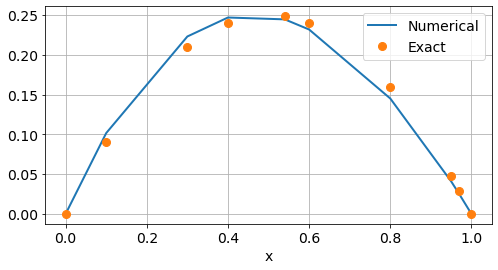

In [208]:
plt.plot(Xk, U, Xk, Xk * (1-Xk), 'o')
plt.legend(['Numerical','Exact'])
plt.xlabel('x');

In [209]:
def func2(x, consts):
    alpha, b, c = consts
    return 9 * np.pi**2 * alpha * np.sin(3*np.pi*x) + 3 * np.pi * b * np.cos(3*np.pi*x) + c* np.sin(3*np.pi * x)

In [210]:
A2 = np.zeros((Mi,Mi))
f = np.zeros((Mi))
alpha,b,c = 2,1,1
consts = [alpha, b, c]
for k in range(1,Mk):
    hi = H[k-1]
    hip1 = H[k]
    A2[k, k-1] = c * (hi / 6) + (b / 2) - (alpha / hi)
    A2[k, k] = c * (hi + hip1) / 3 + alpha * (1/hi + 1/hip1)
    A2[k, k+1] = (c * hip1 / 6) + (b / 2) - (alpha / hip1)

    #f1 = lambda x: func(x, consts) * (x - Xk[k-1]) / hi
    #f2 = lambda x: func(x, consts) * (Xk[k+1] - x) / hip1
 
    def f1(x):
        return func2(x, consts) * (x - Xk[k-1]) / hi
    
    def f2(x):
        return func2(x, consts) * (Xk[k+1] - x) / hip1
    """xtest = np.linspace(Xk[k-1], Xk[k], 10)
    plt.plot(xtest, f1(xtest))
    xtest = np.linspace(Xk[k], Xk[k+1], 10)
    plt.plot(xtest, f2(xtest))"""

    f[k] = (integrate.quad(f1, Xk[k-1], Xk[k])[0] + integrate.quad(f2, Xk[k], Xk[k+1])[0])
    
xtest = np.linspace(0,1,50)
#plt.plot(xtest, func(xtest, consts))

In [211]:
# Impose boundary condition
# Dirichlet boundary conditions
A2[0,:] = 0;
A2[0,0] = 1
f[0] = 0
A2[-1,:] = 0
A2[-1,-1] = 1
f[-1] = 0
print("A=\n", np.around(A2,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=3, out=None))

A=
 [[  1.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [-19.5  30.1  -9.5   0.    0.    0.    0.    0.    0.    0. ]
 [  0.   -9.5  30.1 -19.5   0.    0.    0.    0.    0.    0. ]
 [  0.    0.  -19.5  34.4 -13.8   0.    0.    0.    0.    0. ]
 [  0.    0.    0.  -13.8  47.7 -32.8   0.    0.    0.    0. ]
 [  0.    0.    0.    0.  -32.8  43.4  -9.5   0.    0.    0. ]
 [  0.    0.    0.    0.    0.   -9.5  23.5 -12.8   0.    0. ]
 [  0.    0.    0.    0.    0.    0.  -12.8 113.4 -99.5   0. ]
 [  0.    0.    0.    0.    0.    0.    0.  -99.5 166.7 -66.2]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    1. ]] 

 f= [  0.     21.679  12.042 -13.865 -16.265  -2.966  22.723  10.452   0.879
   0.   ]


In [212]:
print(A-A2)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.06666667  0.4        -0.86666667  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.13333333  0.4        -0.93333333  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.06666667  0.32       -0.90666667  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.09333333  0.26666667 -0.96
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.04        0.34666667
  -0.86666667  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.13333333
   0.46666667 -0.9         0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.1         0.22666667 -0.98666667  0.        ]
 [ 0.          0.          0.          0.     

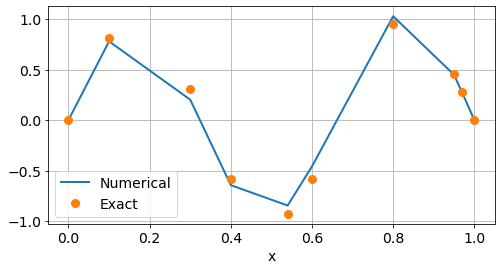

In [213]:
U = np.linalg.solve(A,f)
plt.plot(Xk, U, Xk, np.sin(3*np.pi*Xk), 'o')
plt.legend(['Numerical','Exact'])
plt.xlabel('x');

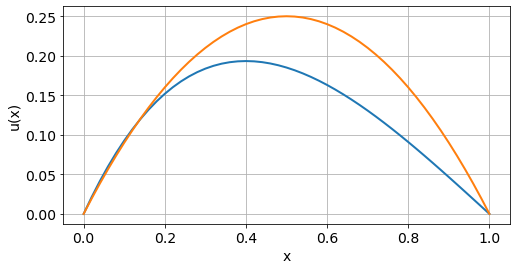

In [214]:
# Define the differential equation and its coefficients

alpha,b,c = 2/3,4/3,-2/3

consts = [alpha, b, c]
# Define the element stiffness matrix
def ke(x1, x2):
    h = x2 - x1
    k = np.zeros((2, 2))
    k[0, 0] = alpha / h + b * h / 3 + c * h / 6
    k[0, 1] = -alpha / h + b * h / 6 - c * h / 6
    k[1, 0] = -alpha / h + b * h / 6 - c * h / 6
    k[1, 1] = alpha / h + b * h / 3 + c * h / 6
    return k

# Define the element load vector
def fe(x1, x2):
    h = x2 - x1
    f = np.zeros(2)
    f[0] = integrate.quad(lambda x: func(x, consts) * (x - x1) / h, x1, x2)[0]
    f[1] = integrate.quad(lambda x: func(x, consts) * (x2 - x) / h, x1, x2)[0]
    return f

# Define the global stiffness matrix and load vector
n = 50 # Number of elements

x = np.linspace(0, 1, n+1) # Node locations
k_global = np.zeros((n+1, n+1))
f_global = np.zeros(n+1)
for i in range(n):
    k_global[i:i+2, i:i+2] += ke(x[i], x[i+1])
    f_global[i:i+2] += fe(x[i], x[i+1])

# Apply Dirichlet boundary conditions
k_global[0,:] = 0
k_global[0,0] = 1
f_global[0] = 0
k_global[-1,:] = 0
k_global[-1,-1] = 1
f_global[-1] = 0

# Solve the linear system
u = np.linalg.solve(k_global, f_global)

# Plot the solution
plt.plot(x, u)
plt.plot(x, x-x**2)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.show()